In [40]:
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt


In [41]:
data = "/Users/willsmalley/Desktop/project3data.csv"

# Read the data and the study results

data = pd.read_csv(data, skiprows=[0])

# Display the data table for preview
data

,id,year,month,carrier,carrier_name,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,id-2,country_code,iata,airport,latitude,longitude
0,0,2020,12,9E,Endeavor Air Inc.,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5985,445,142.89,11.96,...,1509,5060,16,7781,1,US,ATL,Hartsfield-Jackson Atlanta International Airport,33.6367,-84.4281
1,1,2020,12,9E,Endeavor Air Inc.,"Boston, MA: Logan International",21,3,1.00,0.71,...,81,60,0,0,13,US,BOS,Logan International Airport,42.3643,-71.0052
2,2,2020,12,9E,Endeavor Air Inc.,"Baltimore, MD: Baltimore/Washington Internatio...",96,17,8.50,0.00,...,0,200,0,306,19,US,BWI,Baltimore/Washington International Airport,39.1753,-76.6683
3,3,2020,12,9E,Endeavor Air Inc.,"Charlotte, NC: Charlotte Douglas International",42,1,1.00,0.00,...,0,0,0,0,10,US,CLT,Charlotte Douglas International Airport,35.2140,-80.9431
4,4,2020,12,9E,Endeavor Air Inc.,"Washington, DC: Ronald Reagan Washington National",37,1,0.00,0.00,...,0,2,0,13,24,US,DCA,Ronald Reagan Washington National Airport,38.8522,-77.0378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,579,2019,12,DL,Delta Air Lines Inc.,"San Diego, CA: San Diego International",774,161,46.70,6.28,...,739,2969,0,1503,15,US,SAN,San Diego International Airport,32.7336,-117.1900
580,580,2019,12,DL,Delta Air Lines Inc.,"Seattle, WA: Seattle/Tacoma International",2513,381,105.40,9.32,...,443,5872,0,9882,16,US,SEA,Seattle-Tacoma International Airport,47.4490,-122.3090
581,581,2019,12,DL,Delta Air Lines Inc.,"San Francisco, CA: San Francisco International",1234,406,53.52,14.82,...,1207,26323,0,4388,17,US,SFO,San Francisco International Airport,37.6190,-122.3750
582,582,2019,12,DL,Delta Air Lines Inc.,"Salt Lake City, UT: Salt Lake City International",3977,612,195.77,21.00,...,1681,7932,0,14659,0,US,SLC,Salt Lake City International Airport,40.7884,-111.9780


In [42]:
group_data = data.groupby(['airport', 'arr_cancelled']).size().reset_index(name='count')
group_data


,airport,arr_cancelled,count
0,Baltimore/Washington International Airport,0,14
1,Baltimore/Washington International Airport,1,6
2,Baltimore/Washington International Airport,2,1
3,Baltimore/Washington International Airport,4,2
4,Baltimore/Washington International Airport,5,1
...,...,...,...
274,Seattle-Tacoma International Airport,8,1
275,Seattle-Tacoma International Airport,16,1
276,Seattle-Tacoma International Airport,27,1
277,Seattle-Tacoma International Airport,47,1


In [43]:
total_cancelled_per_airport = data.groupby('airport')['arr_cancelled'].sum().reset_index(name='total_cancelled')

total_cancelled_per_airport = total_cancelled_per_airport.sort_values(by='total_cancelled', ascending=False)

# Display the resulting DataFrame
total_cancelled_per_airport

,airport,total_cancelled
12,Logan International Airport,467
2,Chicago O'Hare International Airport,457
23,San Francisco International Airport,433
3,Dallas/Fort Worth International Airport,428
4,Denver International Airport,396
16,Newark Liberty International Airport,366
11,LaGuardia Airport,313
15,Minneapolis-Saint Paul International Airport (...,313
13,Los Angeles International Airport,217
0,Baltimore/Washington International Airport,187


In [44]:
group_data1 = data.groupby(['airport', 'arr_del15']).size().reset_index(name='count')
group_data1


,airport,arr_del15,count
0,Baltimore/Washington International Airport,1,2
1,Baltimore/Washington International Airport,3,2
2,Baltimore/Washington International Airport,4,3
3,Baltimore/Washington International Airport,5,1
4,Baltimore/Washington International Airport,7,2
...,...,...,...
536,Seattle-Tacoma International Airport,203,1
537,Seattle-Tacoma International Airport,235,1
538,Seattle-Tacoma International Airport,281,1
539,Seattle-Tacoma International Airport,381,1


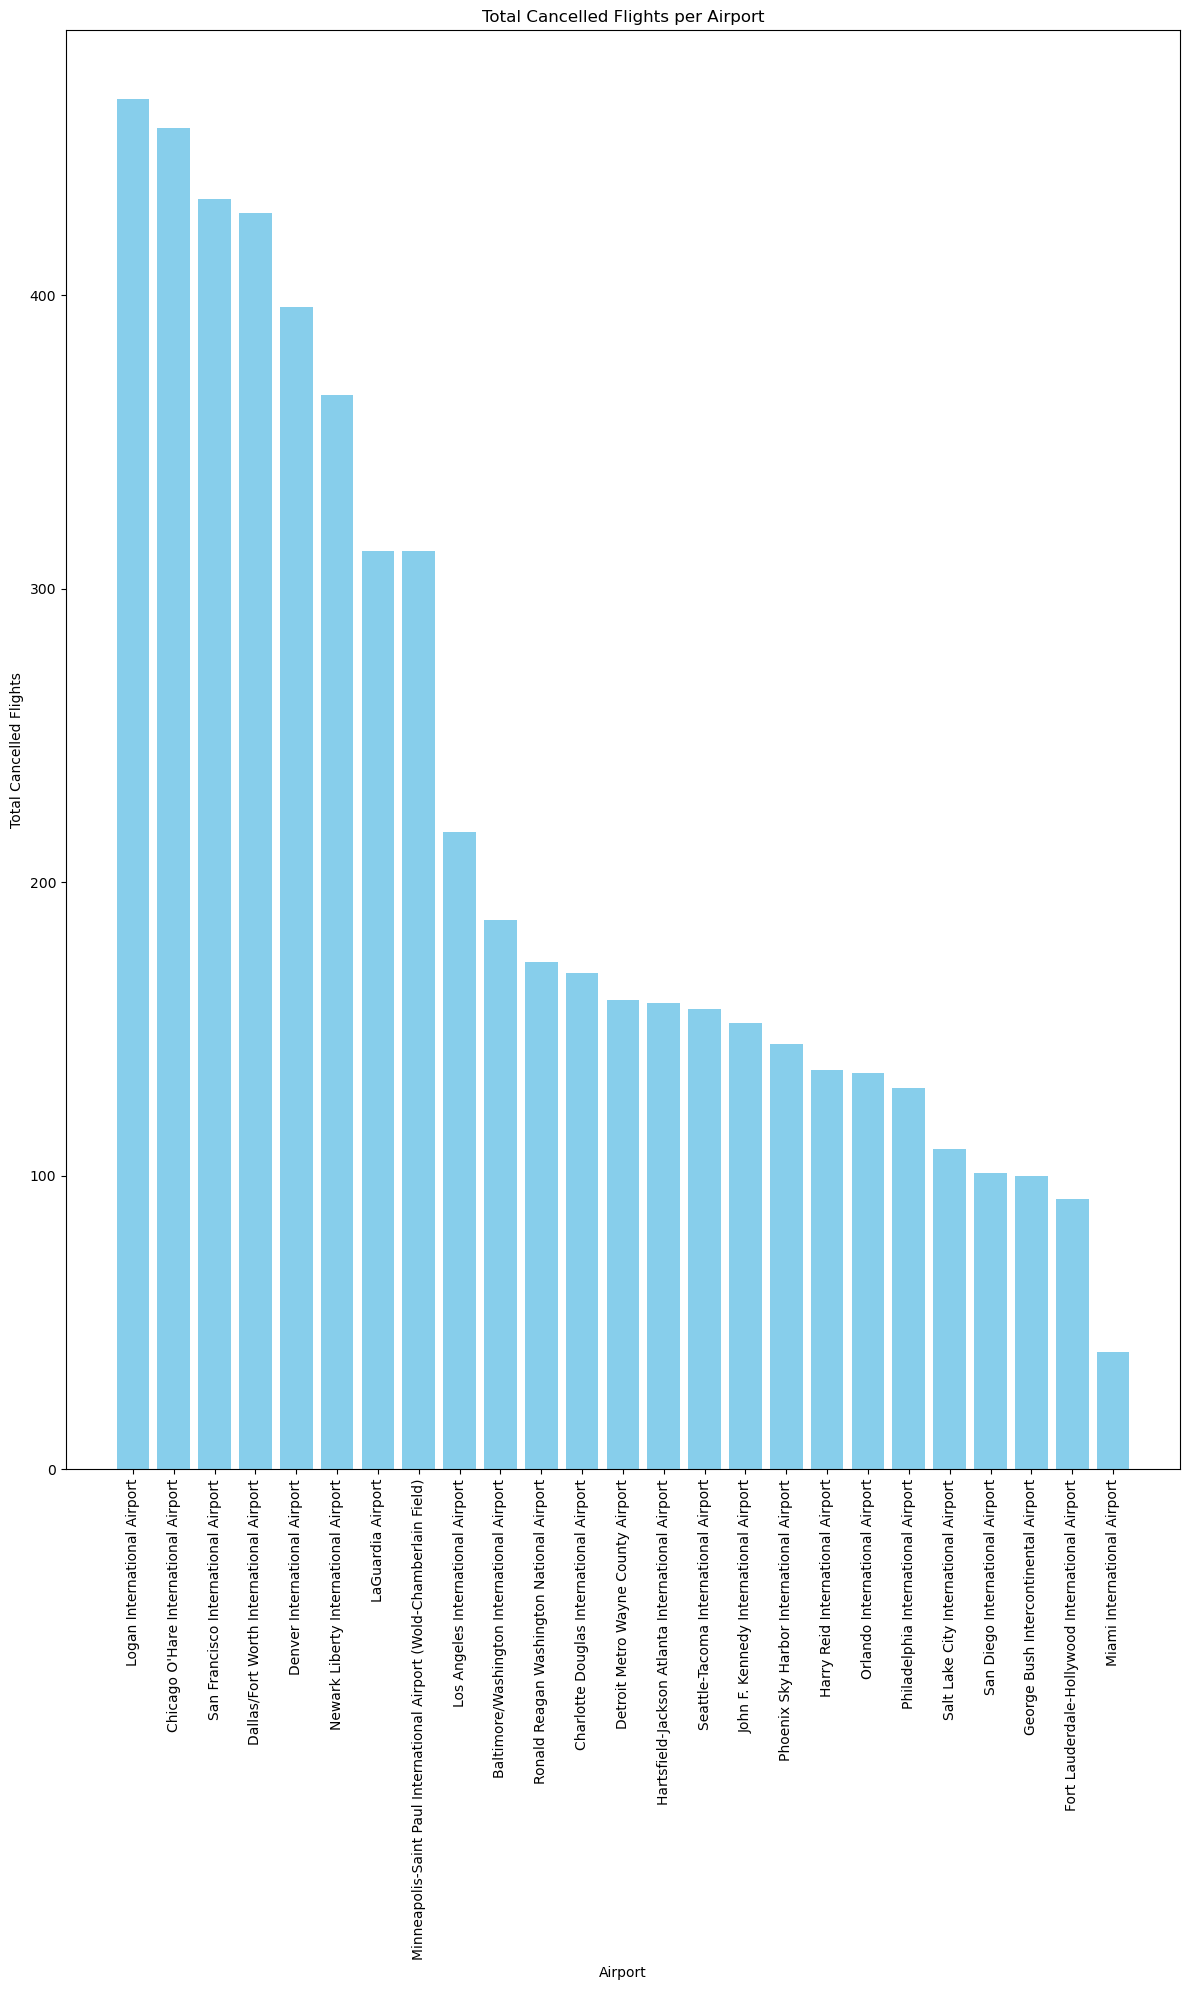

In [45]:
otal_cancelled_per_airport = data.groupby('airport')['arr_cancelled'].sum().reset_index(name='total_cancelled')

# Sorting the DataFrame in descending order based on 'total_cancelled'
total_cancelled_per_airport_sorted = total_cancelled_per_airport.sort_values(by='total_cancelled', ascending=False)

# Creating a bar chart
plt.figure(figsize=(12, 20))
plt.bar(total_cancelled_per_airport_sorted['airport'], total_cancelled_per_airport_sorted['total_cancelled'], color='skyblue')
plt.xlabel('Airport')
plt.ylabel('Total Cancelled Flights')
plt.title('Total Cancelled Flights per Airport')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

In [46]:
long_delays_airport = data.groupby('airport')['arr_del15'].sum().reset_index(name='Long Delays')

# Sorting the DataFrame in descending order based on 'total_cancelled'
long_delays_airport = long_delays_airport.sort_values(by='Long Delays', ascending=False)

long_delays_airport

,airport,Long Delays
3,Dallas/Fort Worth International Airport,8448
2,Chicago O'Hare International Airport,6610
4,Denver International Airport,6569
9,Hartsfield-Jackson Atlanta International Airport,6554
13,Los Angeles International Airport,5372
23,San Francisco International Airport,5170
16,Newark Liberty International Airport,4646
1,Charlotte Douglas International Airport,4573
12,Logan International Airport,4370
19,Phoenix Sky Harbor International Airport,4199


In [47]:
long_delays_airport = data.groupby('airport')['arr_del15'].sum().reset_index(name='Delays 15 Min or More')

long_delays_airport = long_delays_airport.sort_values(by='Delays 15 Min or More', ascending=False)

# Display the resulting DataFrame
long_delays_airport



,airport,Delays 15 Min or More
3,Dallas/Fort Worth International Airport,8448
2,Chicago O'Hare International Airport,6610
4,Denver International Airport,6569
9,Hartsfield-Jackson Atlanta International Airport,6554
13,Los Angeles International Airport,5372
23,San Francisco International Airport,5170
16,Newark Liberty International Airport,4646
1,Charlotte Douglas International Airport,4573
12,Logan International Airport,4370
19,Phoenix Sky Harbor International Airport,4199


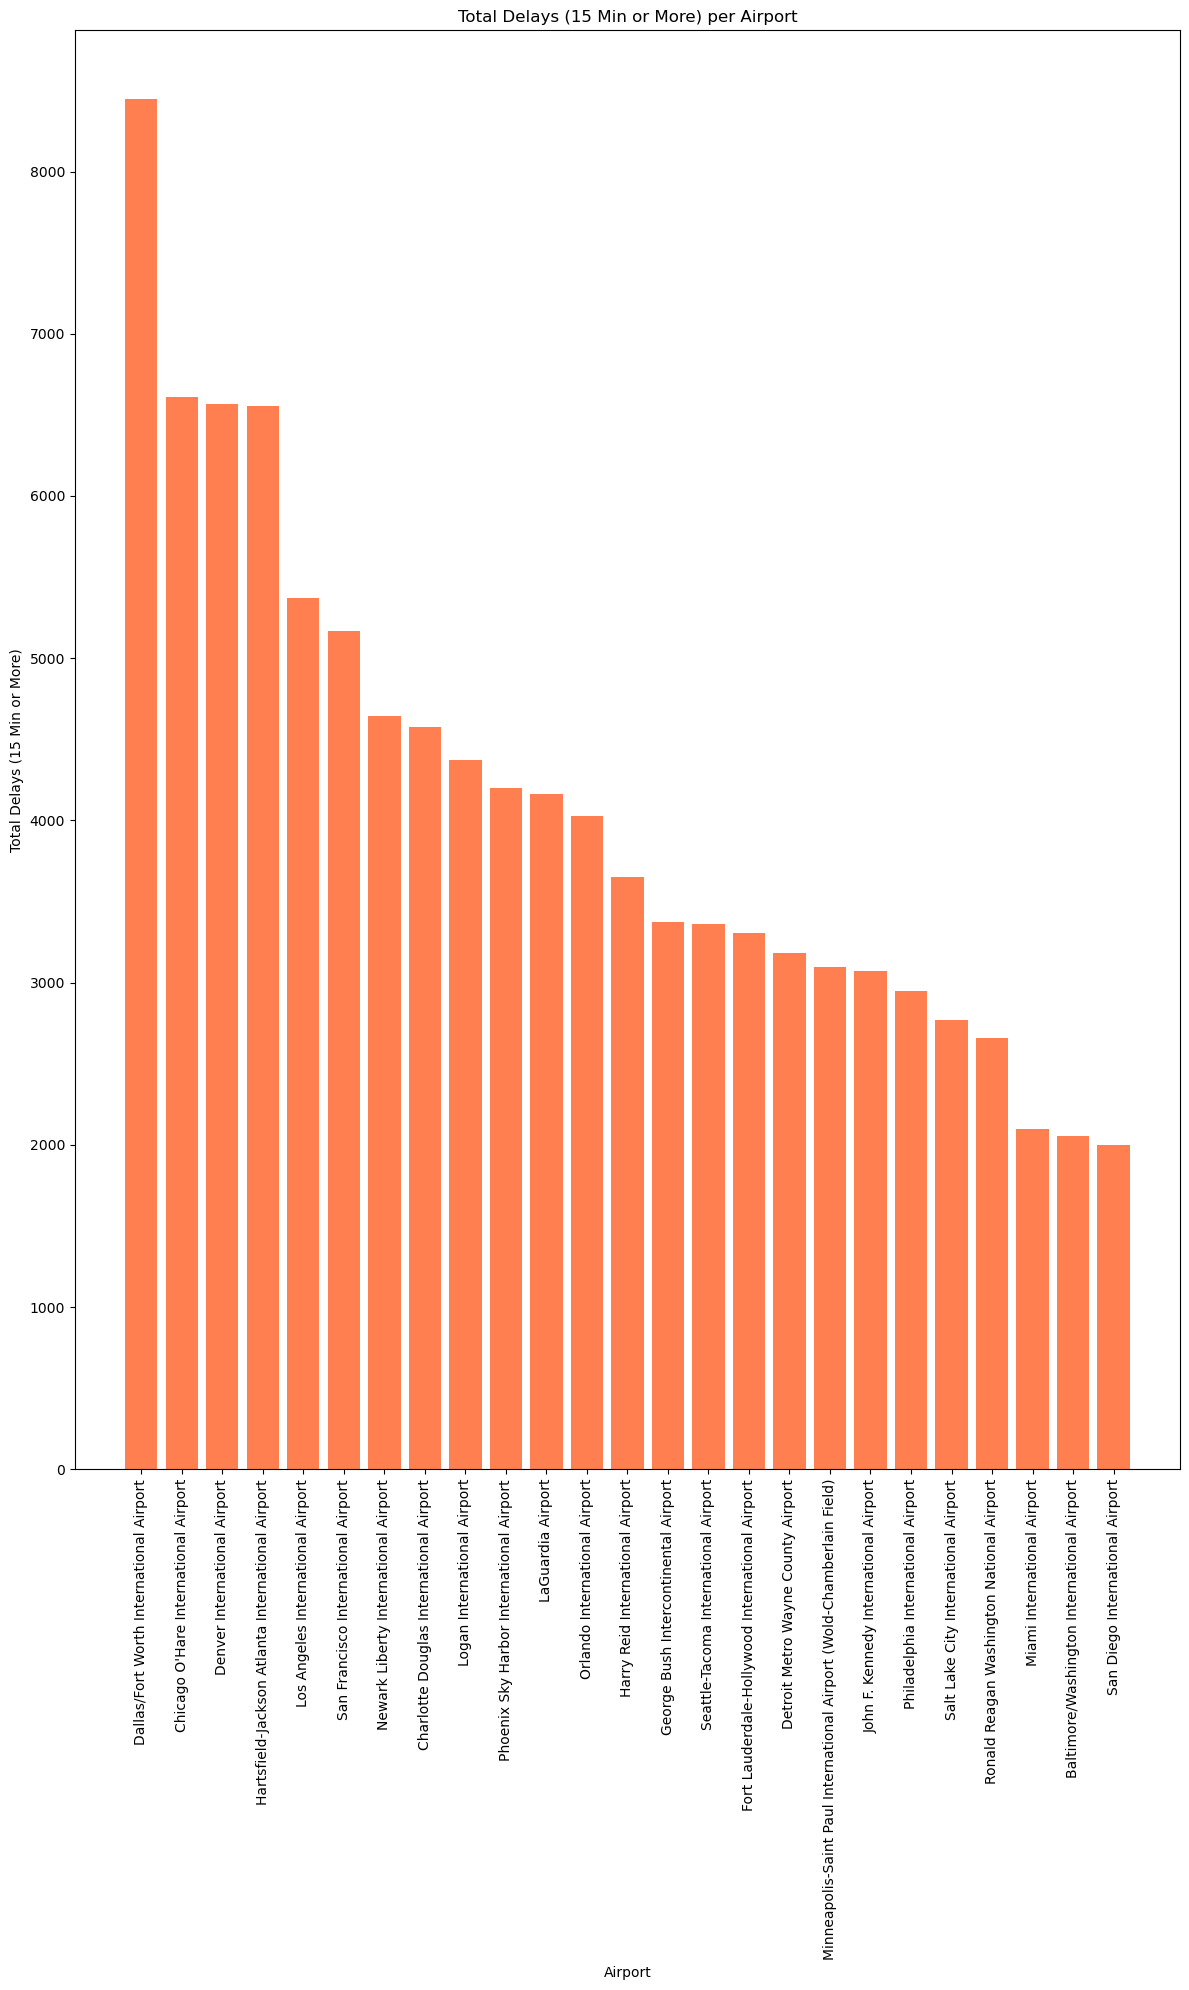

In [49]:
long_delays_airport = data.groupby('airport')['arr_del15'].sum().reset_index(name='Delays 15 Min or More')

# Sorting the DataFrame in descending order based on 'Delays 15 Min or More'
long_delays_airport_sorted = long_delays_airport.sort_values(by='Delays 15 Min or More', ascending=False)

# Creating a bar chart
plt.figure(figsize=(12, 20))
plt.bar(long_delays_airport_sorted['airport'], long_delays_airport_sorted['Delays 15 Min or More'], color='coral')
plt.xlabel('Airport')
plt.ylabel('Total Delays (15 Min or More)')
plt.title('Total Delays (15 Min or More) per Airport')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

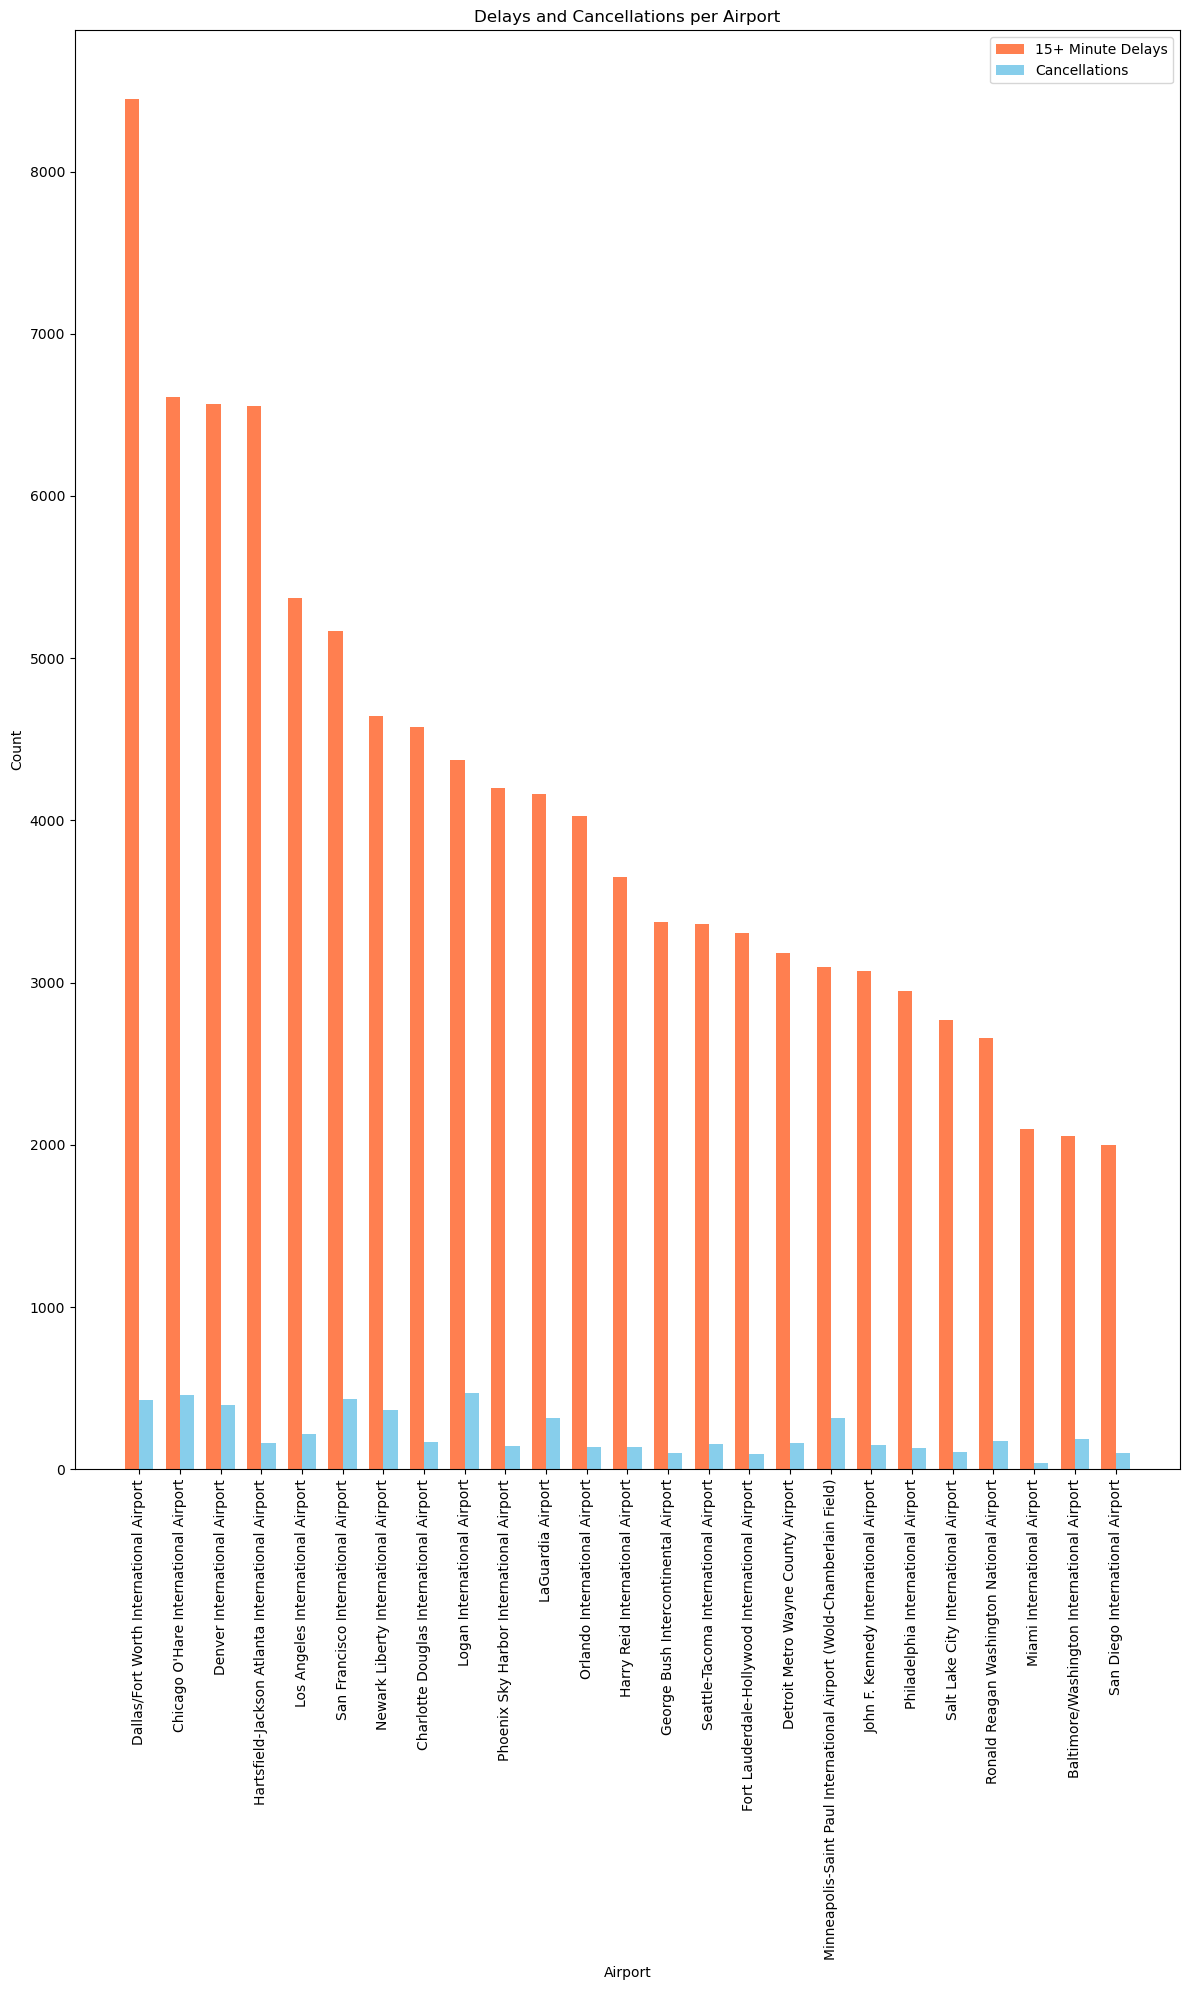

In [55]:
grouped_data = data.groupby('airport')[['arr_del15', 'arr_cancelled']].sum().reset_index()

# Sorting the DataFrame based on 'arr_del15' in descending order
grouped_data_sorted = grouped_data.sort_values(by='arr_del15', ascending=False)

# Creating a grouped bar chart
plt.figure(figsize=(12, 20))

bar_width = 0.35
index = range(len(grouped_data_sorted))

plt.bar(index, grouped_data_sorted['arr_del15'], width=bar_width, label='15+ Minute Delays', color='coral')
plt.bar([i + bar_width for i in index], grouped_data_sorted['arr_cancelled'], width=bar_width, label='Cancellations', color='skyblue')

plt.xlabel('Airport')
plt.ylabel('Count')
plt.title('Delays and Cancellations per Airport')
plt.xticks([i + bar_width/2 for i in index], grouped_data_sorted['airport'], rotation=90)
plt.legend()

# Display the grouped bar chart
plt.tight_layout()
plt.show()

In [57]:
total_cancelled_per_airline = data.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='total_cancelled')

total_cancelled_per_airline = total_cancelled_per_airline.sort_values(by='total_cancelled', ascending=False)

# Display the resulting DataFrame
total_cancelled_per_airline

,carrier_name,total_cancelled
13,SkyWest Airlines Inc.,1116
14,Southwest Airlines Co.,780
12,Republic Airline,574
3,Delta Air Lines Inc.,484
16,United Air Lines Inc.,363
2,American Airlines Inc.,335
5,Envoy Air,305
10,Mesa Airlines Inc.,243
4,Endeavor Air Inc.,236
9,JetBlue Airways,235


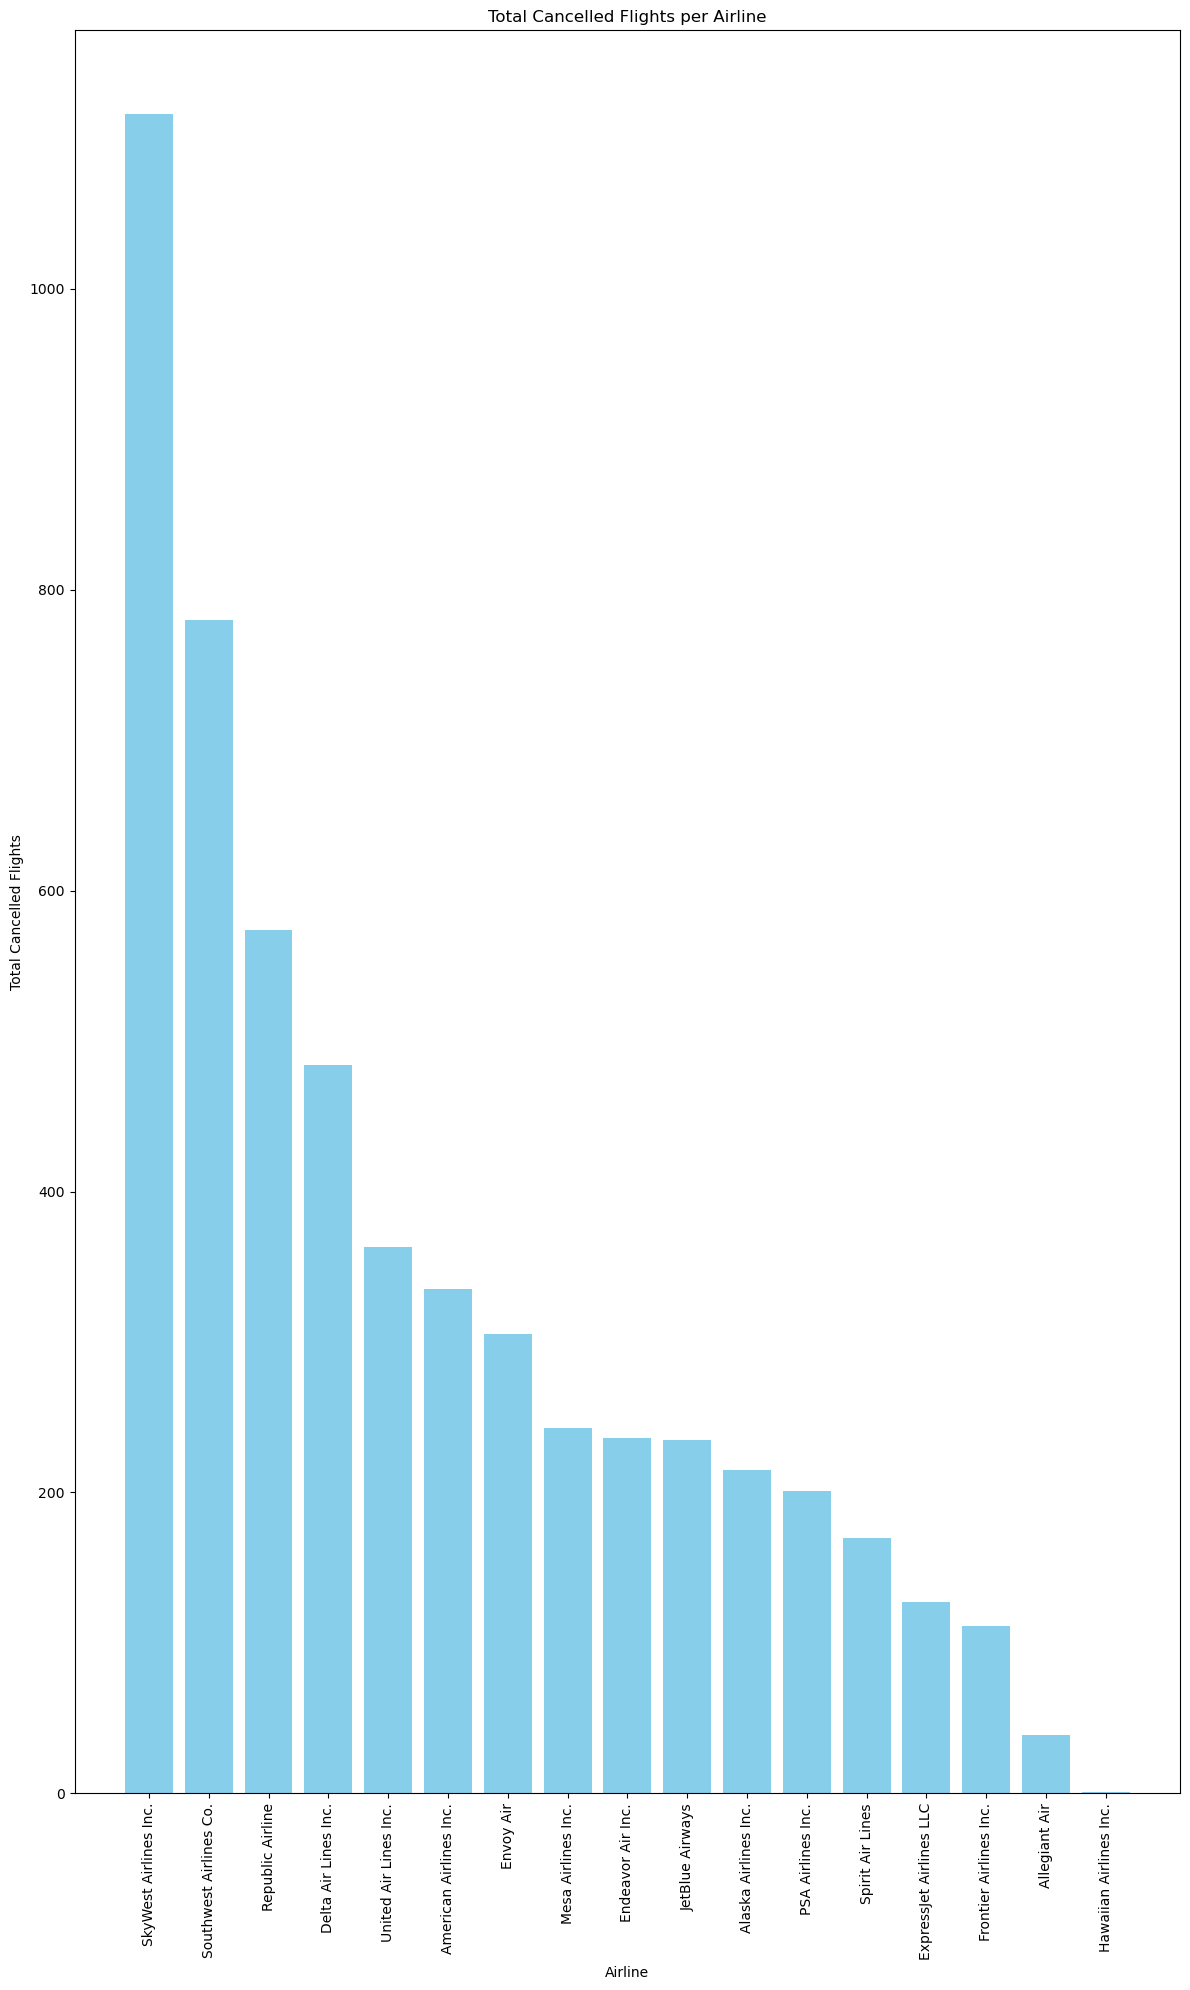

In [61]:
total_cancelled_per_airline = data.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='total_cancelled')

# Sorting the DataFrame in descending order based on 'total_cancelled'
total_cancelled_per_airline_sorted = total_cancelled_per_airline.sort_values(by='total_cancelled', ascending=False)

# Creating a bar chart
plt.figure(figsize=(12, 20))
plt.bar(total_cancelled_per_airline_sorted['carrier_name'], total_cancelled_per_airline_sorted['total_cancelled'], color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Total Cancelled Flights')
plt.title('Total Cancelled Flights per Airline')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

In [62]:
long_delays_airline = data.groupby('carrier_name')['arr_del15'].sum().reset_index(name='Delays 15 Min or More')

long_delays_airline = long_delays_airline.sort_values(by='Delays 15 Min or More', ascending=False)

# Display the resulting DataFrame
long_delays_airline


,carrier_name,Delays 15 Min or More
2,American Airlines Inc.,14830
3,Delta Air Lines Inc.,14573
14,Southwest Airlines Co.,13004
13,SkyWest Airlines Inc.,10976
16,United Air Lines Inc.,10252
9,JetBlue Airways,7267
12,Republic Airline,4944
5,Envoy Air,4493
0,Alaska Airlines Inc.,3974
15,Spirit Air Lines,3786


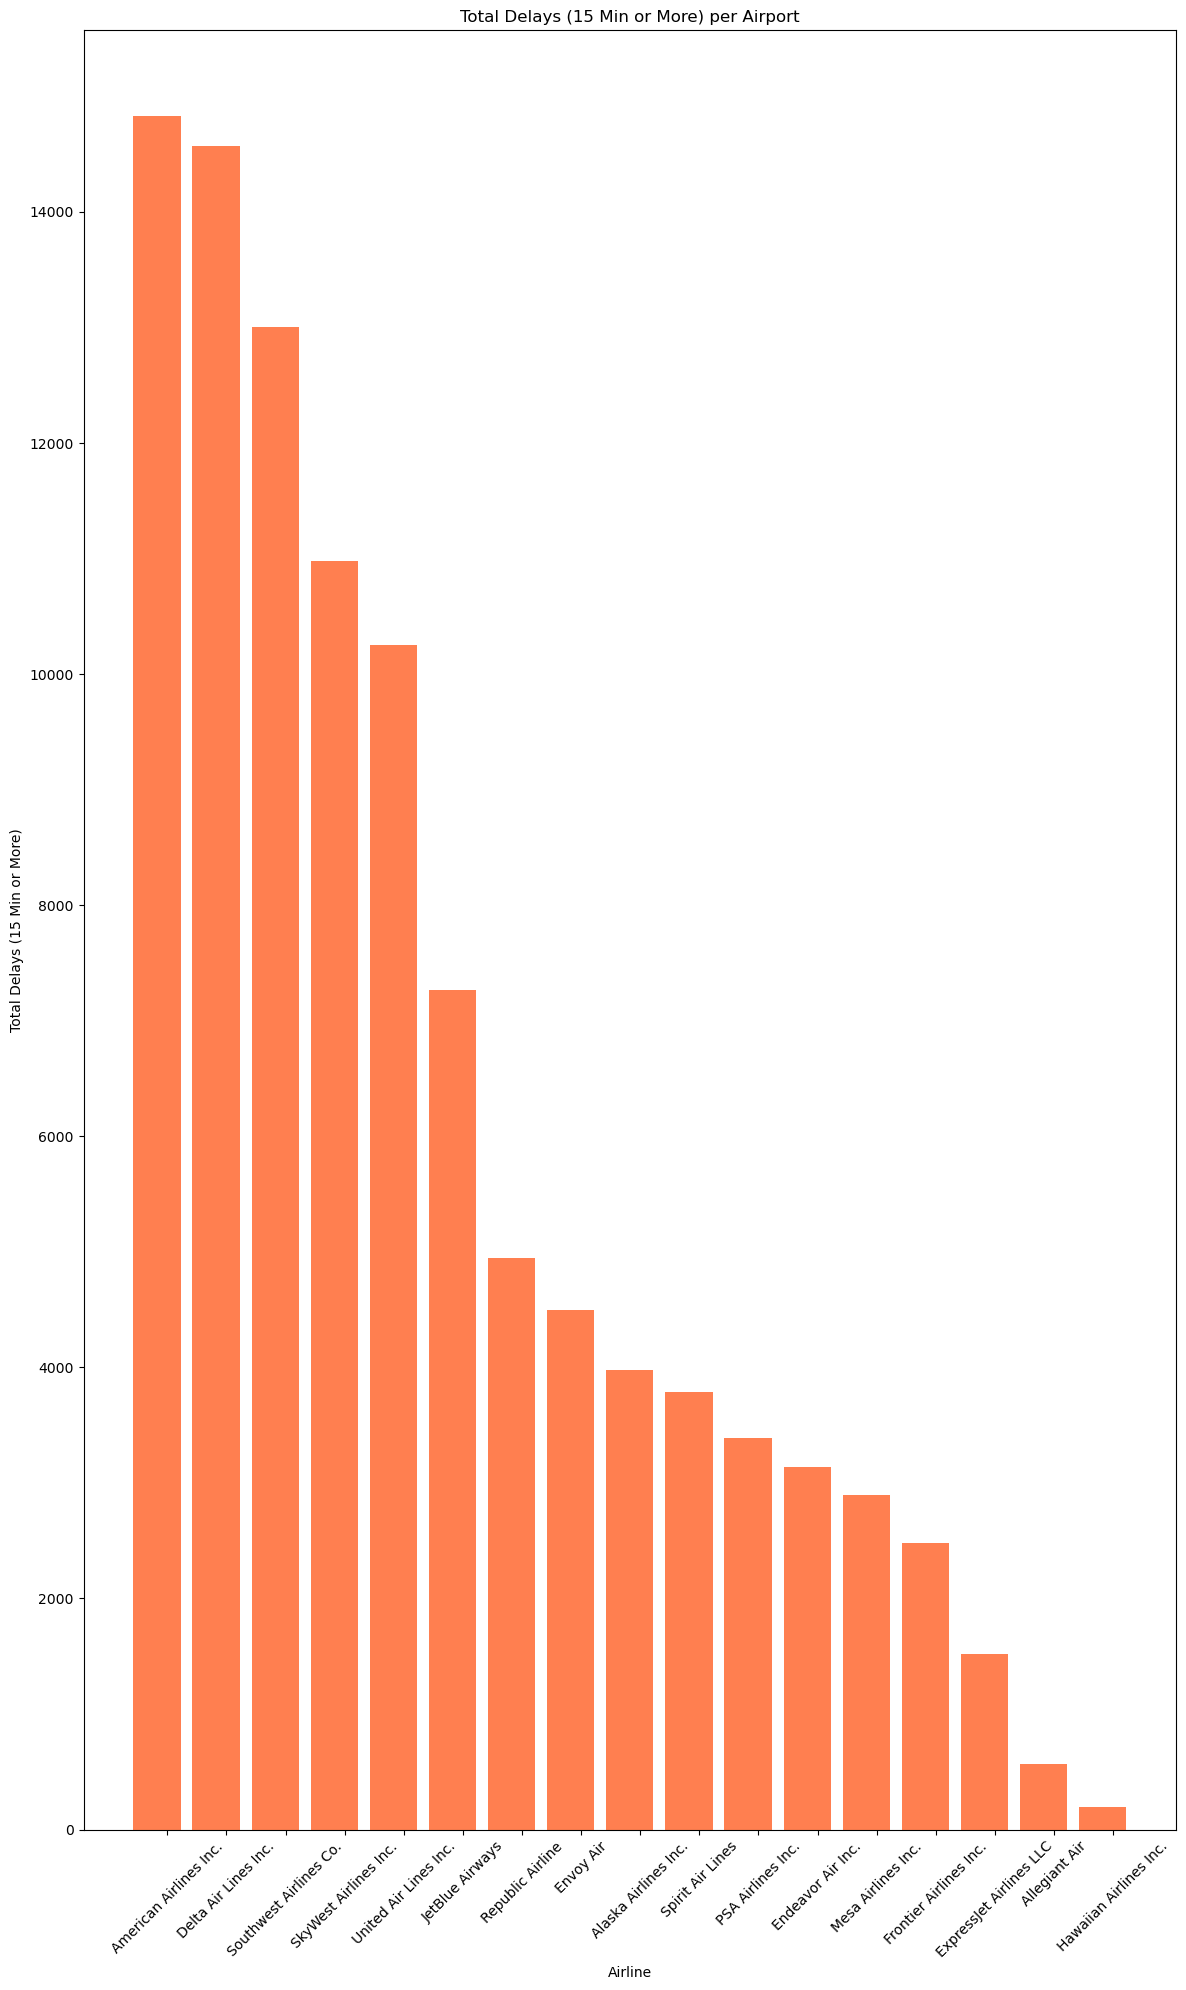

In [70]:
long_delays_airline = data.groupby('carrier_name')['arr_del15'].sum().reset_index(name='Delays 15 Min or More')

# Sorting the DataFrame in descending order based on 'Delays 15 Min or More'
long_delays_airline_sorted = long_delays_airline.sort_values(by='Delays 15 Min or More', ascending=False)

# Creating a bar chart
plt.figure(figsize=(12, 20))
plt.bar(long_delays_airline_sorted['carrier_name'], long_delays_airline_sorted['Delays 15 Min or More'], color='coral')
plt.xlabel('Airline')
plt.ylabel('Total Delays (15 Min or More)')
plt.title('Total Delays (15 Min or More) per Airport')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xticks([i + bar_width/2 for i in index], grouped_data_sorted['carrier_name'], rotation=45)  # Adjust the rotation angle as needed

plt.tight_layout()

# Display the bar chart
plt.show()

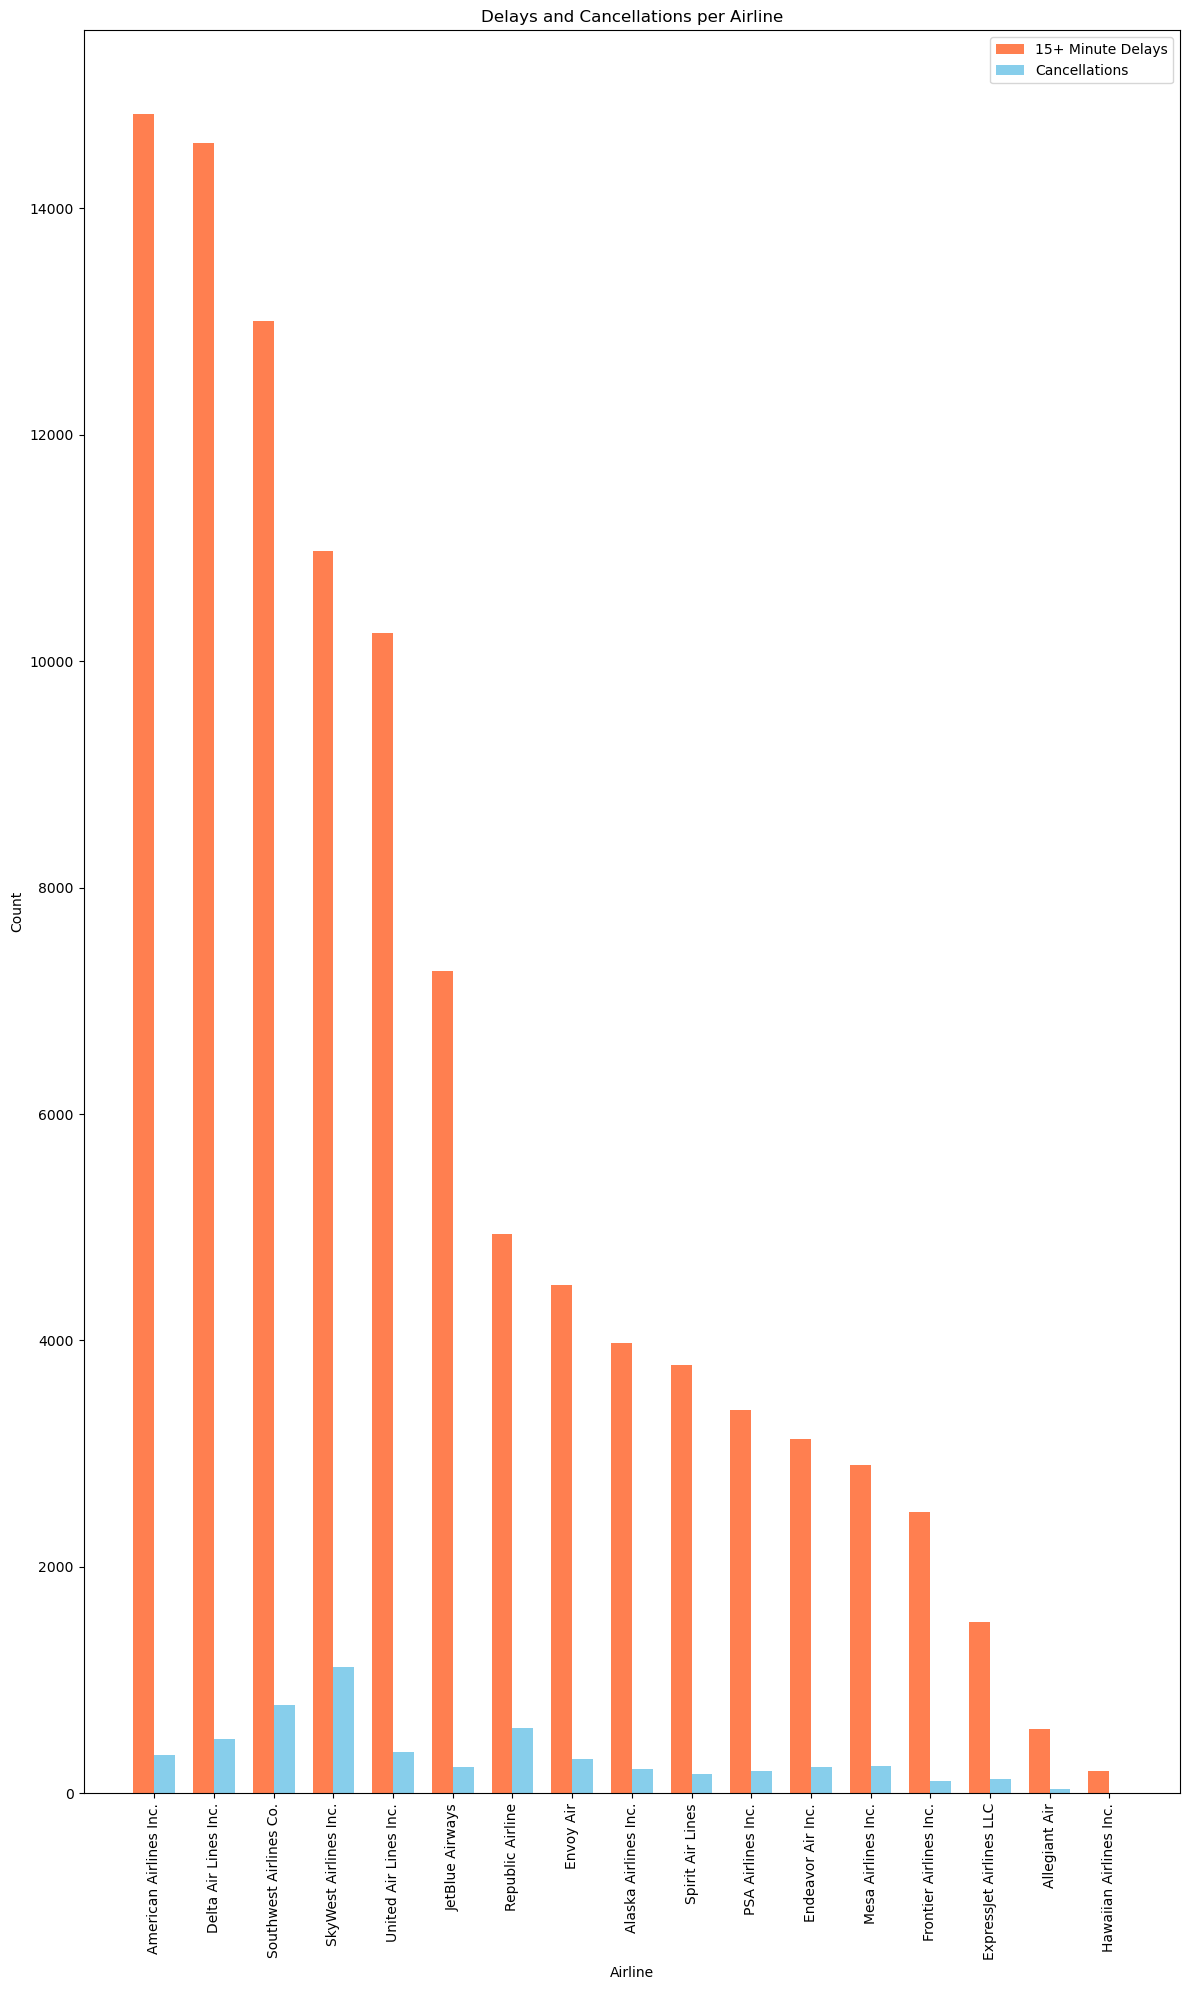

In [68]:


# Grouping by 'carrier_name' and summing up the counts for each airline
grouped_data = data.groupby('carrier_name')[['arr_del15', 'arr_cancelled']].sum().reset_index()

# Sorting the DataFrame based on 'arr_del15' in descending order
grouped_data_sorted = grouped_data.sort_values(by='arr_del15', ascending=False)

# Creating a grouped bar chart
plt.figure(figsize=(12, 20))

bar_width = 0.35
index = range(len(grouped_data_sorted))

plt.bar(index, grouped_data_sorted['arr_del15'], width=bar_width, label='15+ Minute Delays', color='coral')
plt.bar([i + bar_width for i in index], grouped_data_sorted['arr_cancelled'], width=bar_width, label='Cancellations', color='skyblue')

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Delays and Cancellations per Airline')
plt.xticks([i + bar_width/2 for i in index], grouped_data_sorted['carrier_name'], rotation=90)  # Use 'carrier_name' instead of 'airport'
plt.legend()

# Display the grouped bar chart
plt.tight_layout()
plt.show()


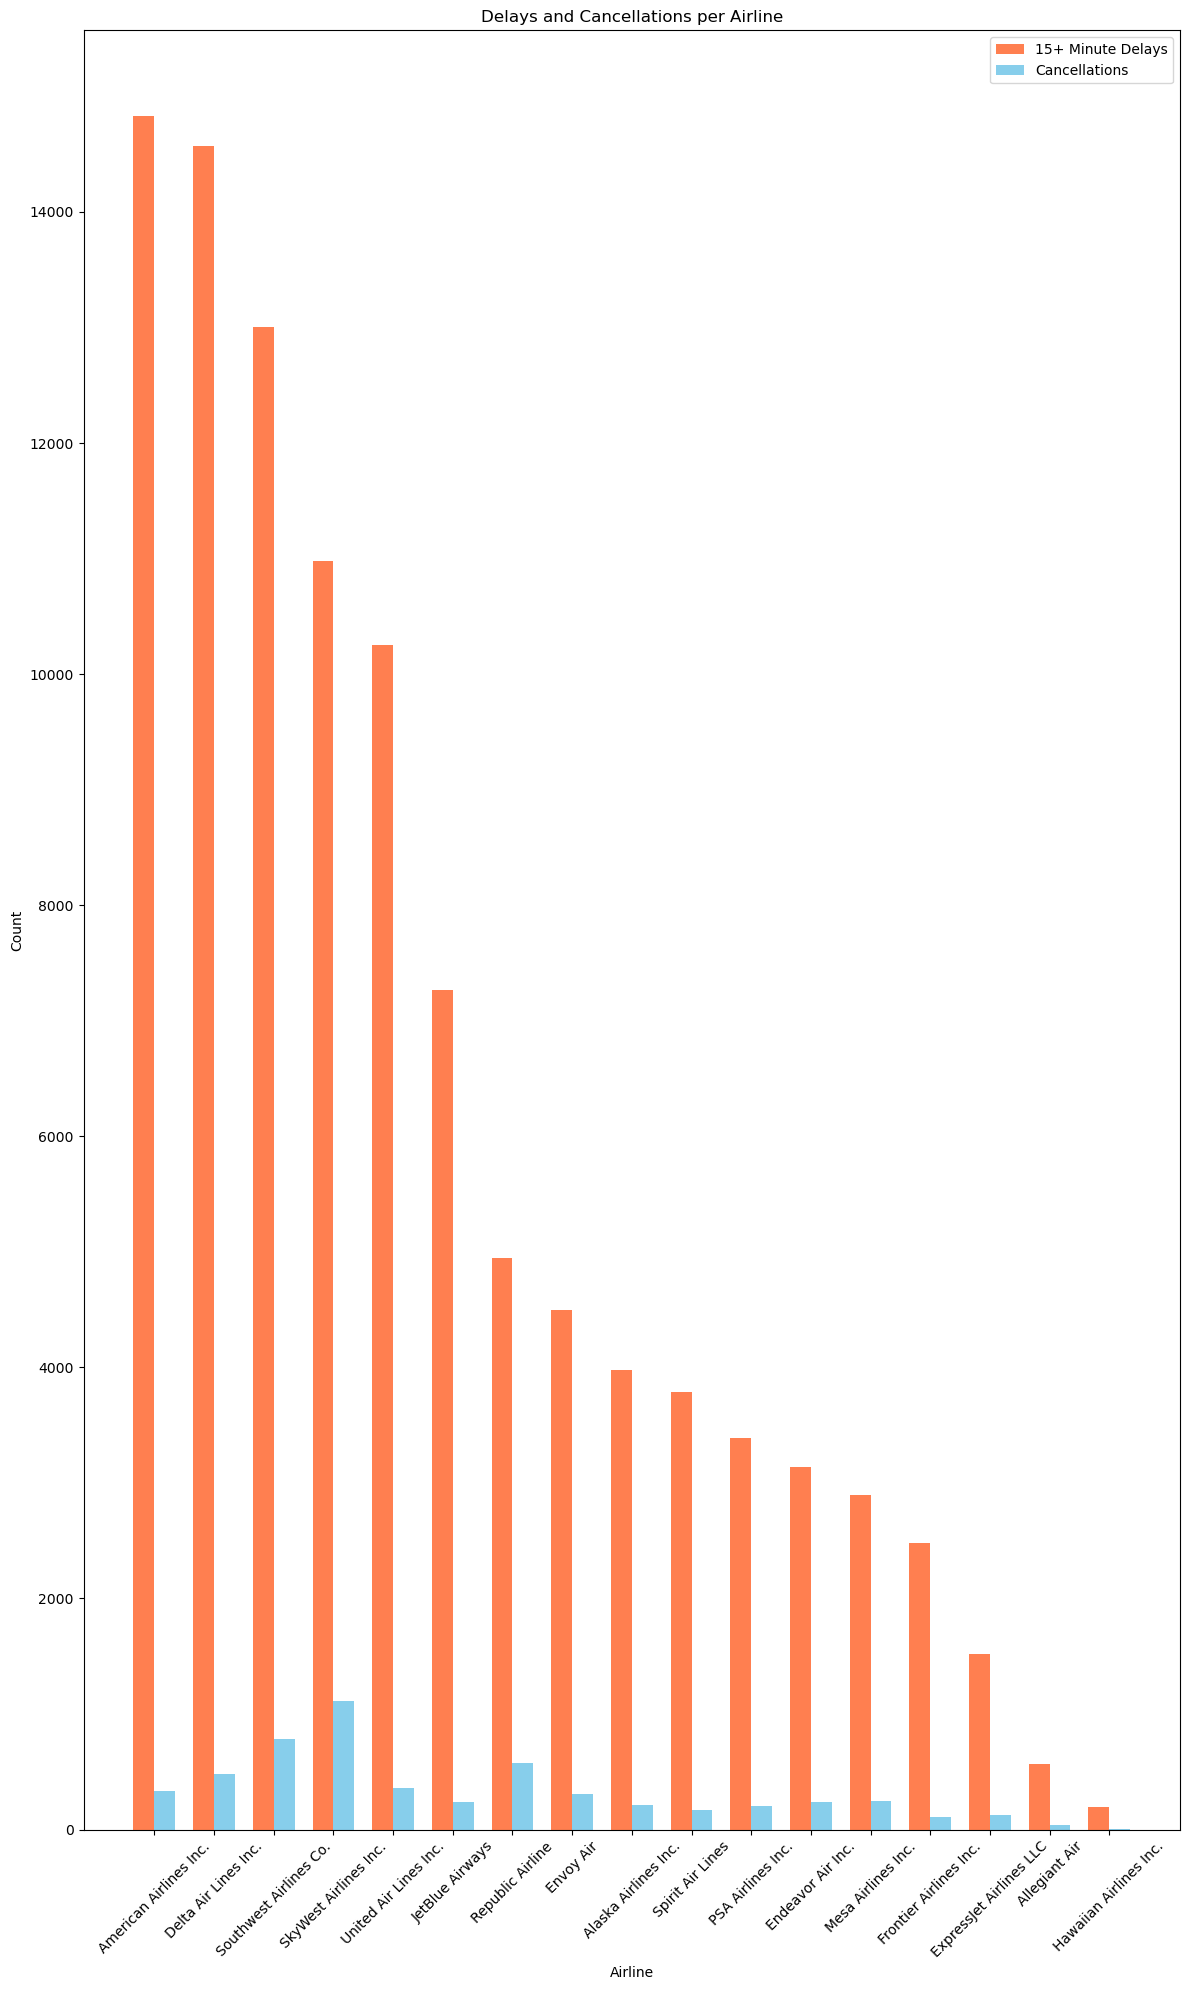

In [69]:
# Grouping by 'carrier_name' and summing up the counts for each airline
grouped_data = data.groupby('carrier_name')[['arr_del15', 'arr_cancelled']].sum().reset_index()

# Sorting the DataFrame based on 'arr_del15' in descending order
grouped_data_sorted = grouped_data.sort_values(by='arr_del15', ascending=False)

# Creating a grouped bar chart
plt.figure(figsize=(12, 20))

bar_width = 0.35
index = range(len(grouped_data_sorted))

plt.bar(index, grouped_data_sorted['arr_del15'], width=bar_width, label='15+ Minute Delays', color='coral')
plt.bar([i + bar_width for i in index], grouped_data_sorted['arr_cancelled'], width=bar_width, label='Cancellations', color='skyblue')

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Delays and Cancellations per Airline')
plt.xticks([i + bar_width/2 for i in index], grouped_data_sorted['carrier_name'], rotation=45)  # Adjust the rotation angle as needed
plt.legend()

# Display the grouped bar chart
plt.tight_layout()
plt.show()


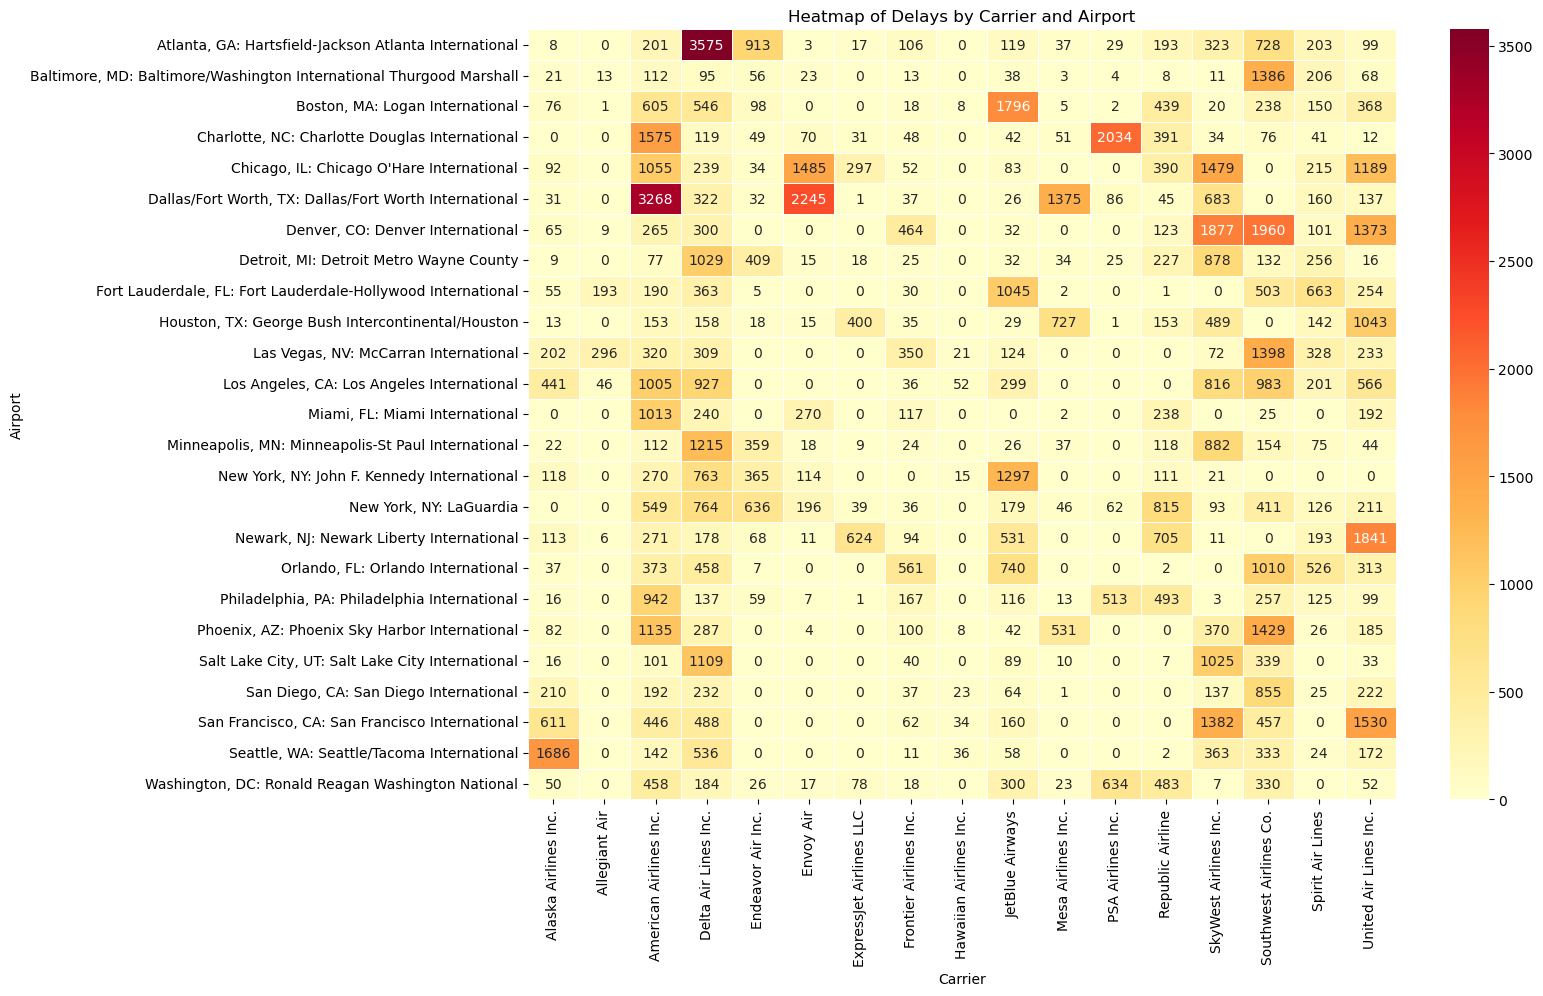

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Modify column names accordingly if needed

# Filter relevant columns
heatmap_data = data[['carrier_name', 'airport_name', 'arr_del15']]

# Pivot the data to create a matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index='airport_name', columns='carrier_name', values='arr_del15', aggfunc='sum', fill_value=0)

# Create a heatmap using seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix, cmap='YlOrRd', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Delays by Carrier and Airport')
plt.xlabel('Carrier')
plt.ylabel('Airport')
plt.show()


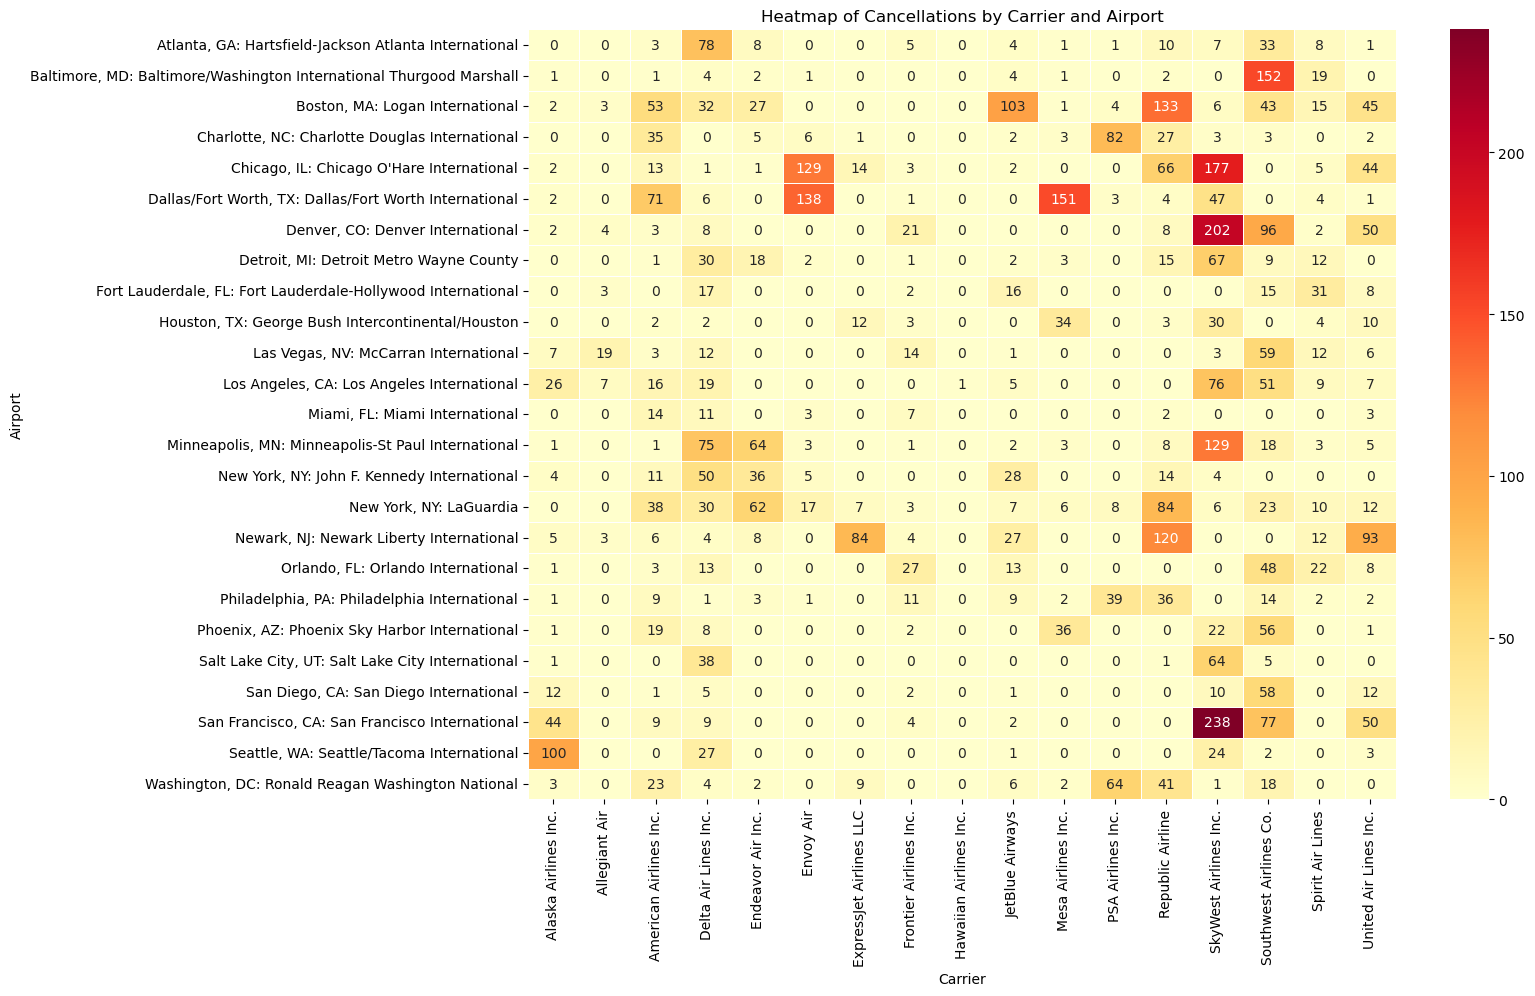

In [79]:
heatmap_data1 = data[['carrier_name', 'airport_name', 'arr_cancelled']]

# Pivot the data to create a matrix for the heatmap
heatmap_matrix1 = heatmap_data1.pivot_table(index='airport_name', columns='carrier_name', values='arr_cancelled', aggfunc='sum', fill_value=0)

# Create a heatmap using seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix1, cmap='YlOrRd', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Cancellations by Carrier and Airport')
plt.xlabel('Carrier')
plt.ylabel('Airport')
plt.show()

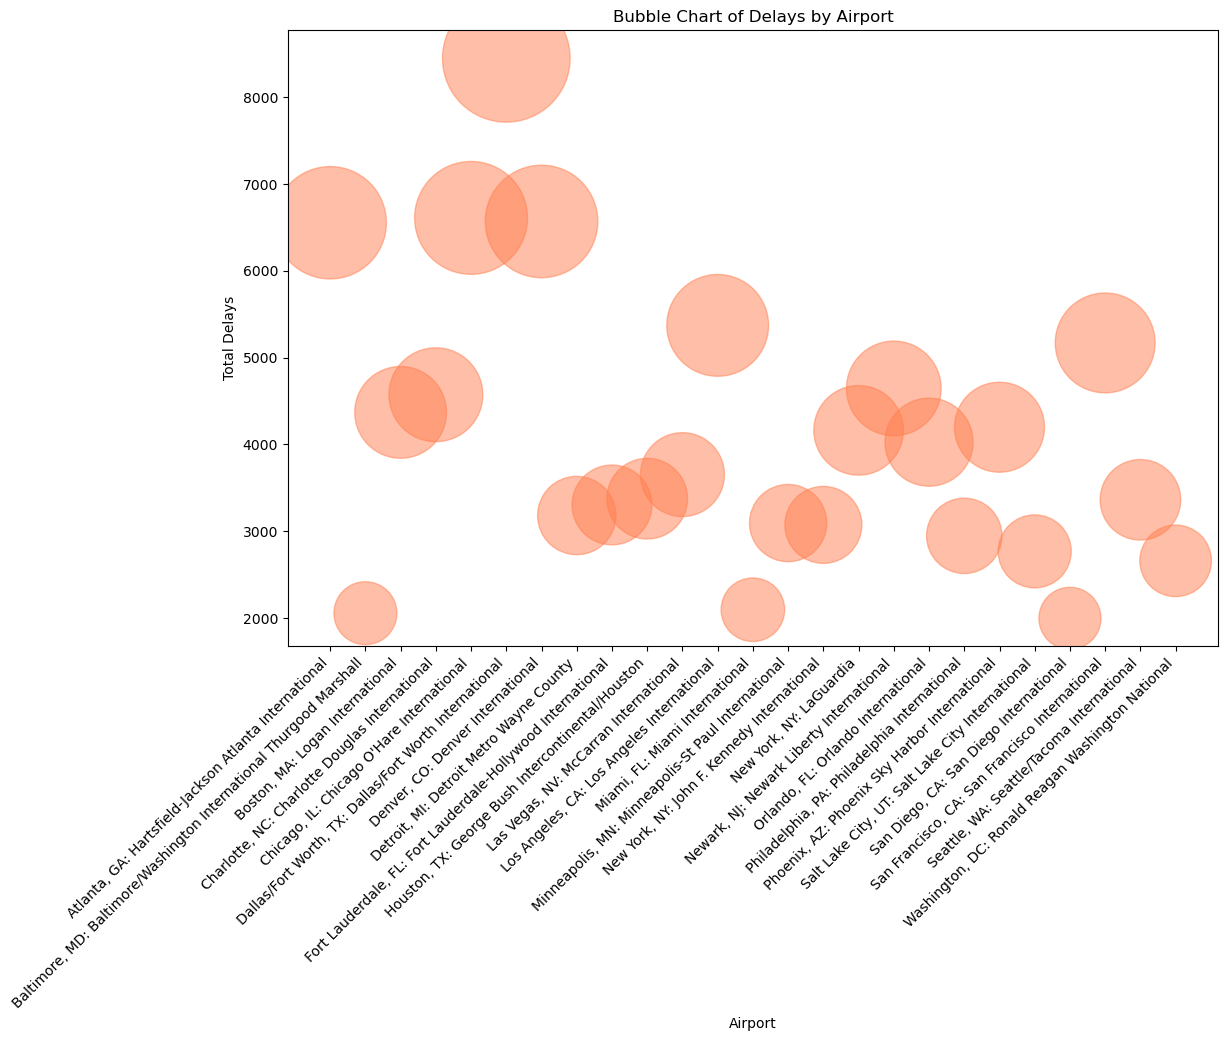

In [74]:
# Assuming your DataFrame is named 'data'
# Modify column names accordingly if needed

# Filter relevant columns
bubble_data = data[['airport_name', 'arr_del15']]

# Aggregate data by airport to get the total delays
bubble_data_agg = bubble_data.groupby('airport_name')['arr_del15'].sum().reset_index()

# Create a bubble chart using matplotlib
plt.figure(figsize=(12, 8))
plt.scatter(bubble_data_agg['airport_name'], bubble_data_agg['arr_del15'], s=bubble_data_agg['arr_del15'], alpha=0.5, c='coral')
plt.title('Bubble Chart of Delays by Airport')
plt.xlabel('Airport')
plt.ylabel('Total Delays')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [77]:
import folium
from folium.plugins import MarkerCluster

# Assuming your DataFrame is named 'data'
# Modify column names accordingly if needed

# Filter relevant columns
map_data = data[['airport_name', 'arr_del15', 'latitude', 'longitude']]

# Create a base map centered at a specific location (e.g., the United States)
m = folium.Map(location=[37.7749, -122.4194], zoom_start=4)

# Create a marker cluster for better performance with a large number of markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each airport
for _, row in map_data.iterrows():
    delay_magnitude = row['arr_del15']
    
    # Adjust the size or color based on the delay magnitude
    if delay_magnitude > 500:
        color = 'red'
    elif delay_magnitude > 100:
        color = 'orange'
    else:
        color = 'green'
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=delay_magnitude / 100,  # Adjust the scaling factor as needed
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{row['airport_name']} - Delays: {delay_magnitude}",
    ).add_to(marker_cluster)

# Save the map to an HTML file or display it
m.save("geospatial_map_delays.html")


In [75]:
pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.3 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


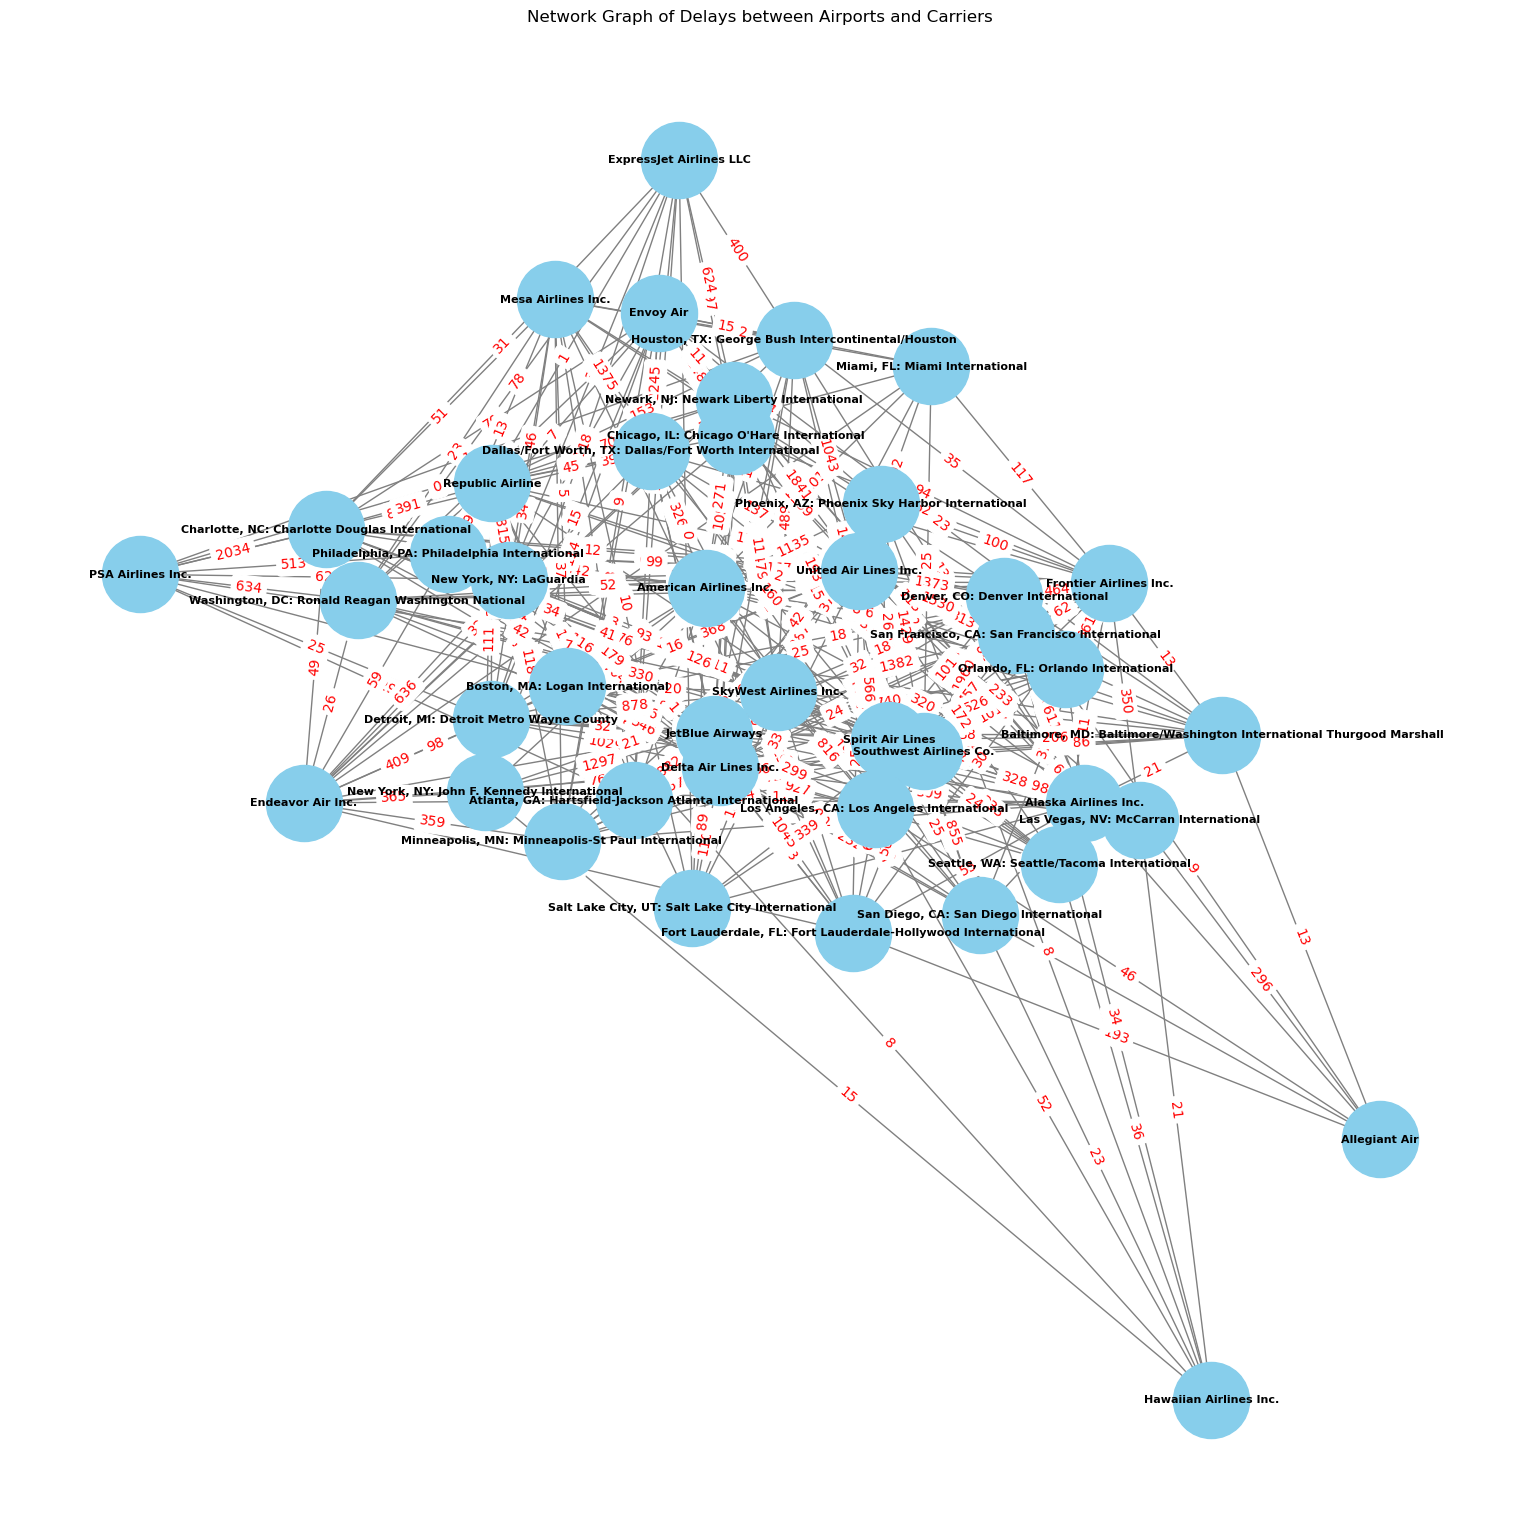

In [76]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Modify column names accordingly if needed

# Filter relevant columns
network_data = data[['airport_name', 'arr_del15', 'carrier_name']]

# Aggregate data by airport and carrier to get the total delays
network_data_agg = network_data.groupby(['airport_name', 'carrier_name'])['arr_del15'].sum().reset_index()

# Create a network graph
G = nx.Graph()

# Add nodes (airports and carriers)
for _, row in network_data_agg.iterrows():
    G.add_node(row['airport_name'], node_type='airport')
    G.add_node(row['carrier_name'], node_type='carrier')
    G.add_edge(row['airport_name'], row['carrier_name'], weight=row['arr_del15'])

# Draw the network graph
pos = nx.spring_layout(G)  # You can try different layout algorithms
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}

plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Network Graph of Delays between Airports and Carriers')
plt.show()


In [90]:
pip install dash pandas plotly


  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/7b/62/438626ab498869249e99376684ba6d88931e7c2dd86d03a92d9d7a9b4c54/dash-2.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for Flask<3.1,>=1.0.4 from https://files.pythonhosted.org/packages/36/42/015c23096649b908c809c69388a805a571a3bea44362fe87e33fc3afa01f/flask-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for Werkzeug<3.1 from https://files.pythonhosted.org/packages/c3/fc/254c3e9b5feb89ff5b9076a23218dafbc99c96ac5941e900b71206e6313b/werkzeug-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for ansi2html from https://files.pythonhosted.org/packages/42/d7/1bc3433a2406b891182c25a7926abe3eb19af5870d540375ebf7795885b3/ansi2html-1.9.1-py3-none-any.whl.me

In [91]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'data'
# Modify column names accordingly if needed

# Sample data
data = pd.DataFrame({
    'year': [2020, 2020, 2021, 2021],
    'month': [1, 2, 1, 2],
    'carrier_name': ['Airline A', 'Airline A', 'Airline B', 'Airline B'],
    'arr_del15': [100, 120, 80, 90],
    'arr_cancelled': [5, 8, 3, 6]
})

# Create a Dash web application
app = dash.Dash(__name__)

# Define layout of the app
app.layout = html.Div([
    html.H1("Flight Data Dashboard"),
    
    dcc.Dropdown(
        id='carrier-dropdown',
        options=[{'label': carrier, 'value': carrier} for carrier in data['carrier_name'].unique()],
        value=data['carrier_name'].unique()[0],
        multi=False,
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='bar-chart'),
    
    dcc.RangeSlider(
        id='year-slider',
        min=data['year'].min(),
        max=data['year'].max(),
        marks={year: str(year) for year in range(data['year'].min(), data['year'].max() + 1)},
        value=[data['year'].min(), data['year'].max()]
    )
])

# Define callback to update bar chart based on dropdown selection and year range
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('carrier-dropdown', 'value'),
     Input('year-slider', 'value')]
)
def update_chart(selected_carrier, selected_years):
    filtered_data = data[(data['carrier_name'] == selected_carrier) & (data['year'].between(*selected_years))]
    
    fig = px.bar(filtered_data, x='month', y='arr_del15', color='year', barmode='group',
                 labels={'arr_del15': '15+ Minute Delays'},
                 title=f'15+ Minute Delays Over Time for {selected_carrier}')
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/0n/mg7f731949lbgrcxnsbt45kh0000gn/T/ipykernel_33375/991397859.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/0n/mg7f731949lbgrcxnsbt45kh0000gn/T/ipykernel_33375/991397859.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
